# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612/652, CS/IT 308 Machine Learning </center>
## <center> Lab#3 Principal component analysis (PCA) and Data generating process </center>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 
from mpl_toolkits import mplot3d

## <font color='red'> 1. Implement PCA for 2D Data.

In this experiment consider 200 samples and obtain the matrix $X$ in $X = C \times D$, where $C=\begin{bmatrix}
1 & 2 \\
1 & 1 \end{bmatrix}$ and $D$ is the randomly generated matix using samples. <font>


Hint for Code: Use np.linalg.eig, np.diag, np.matmul, np.cov

In [ ]:
# 2D Data for example
# Find X
D=np.random.randint(100, size=(2, 200))
C=np.array([[1,2],[1,1]])
X=np.matmul(C,D)
X

array([[154, 112,  62, 129, 143, 169, 221,  97, 176, 260, 216,  18, 230,
        191, 196, 141, 104, 149, 120, 102, 173,  73, 243, 275,  67, 257,
         12, 135, 261, 212, 118,  72, 233, 171,  22, 123, 198, 239, 270,
        135, 200, 200, 214, 144, 223,  82, 121, 105, 112, 150, 193, 236,
        277, 252, 213, 175, 213, 148, 240,  68,  72, 193, 150, 139, 192,
        249, 140,  91, 151,  97,  59, 221, 181,  48,  51, 167, 140, 161,
         45, 194, 103, 129,  76,  72, 110, 247, 122,  69, 209,  45, 209,
        259,  82,  95,  47,  79, 100, 210, 175, 141, 117, 243,  60, 186,
        140, 113, 179,  47, 208, 197, 166, 199, 237, 173, 195, 108, 168,
         86,  89, 186, 216, 148, 277,  69, 149, 178, 193, 114, 170, 190,
        110,  48, 234,  81, 208, 148, 105, 185,  89, 215,  86,  17,  77,
        159, 167, 118, 172,  21, 101, 165, 251, 186, 216, 269, 103, 188,
        157, 129, 135, 251, 120, 243, 209, 181,  83,  17, 163, 209, 139,
        143, 124, 191, 159, 177,  84,  98, 189,  79

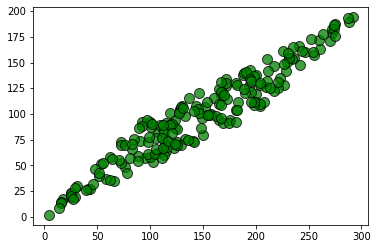

In [ ]:
# code to scatter plot X
#since we have two rows 
x1=X[:1,:]
x2=X[1:2,]
plt.scatter(x1,x2,s=100,c='green',edgecolor='black',linewidth=1,alpha=0.75)

### Implement PCA
Hint: refer class note

In [ ]:
# Write code to impement PCA
X=X-np.mean(X,axis=0)
cov_mat = np.cov(X.T , rowvar = False)

E , P = np.linalg.eigh(cov_mat)

print('eigen values=',E)
print('eigen vectors=\n',P)

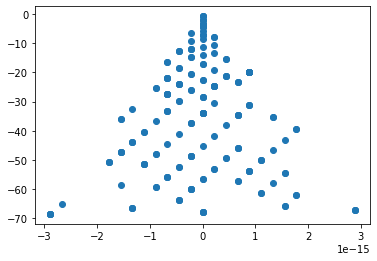

In [ ]:
P_T=np.transpose(P)
Y=np.matmul(P_T,X)
plt.scatter(Y[:][0], Y[:][1])
plt.show()


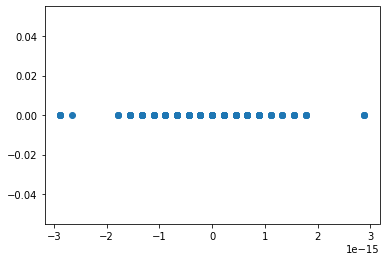

In [ ]:
#Approximate each 2-point data vector using one values
# Hint: Y[-1,:]=0
Y[-1,:]=0
# scatter plot Y
plt.scatter(Y[:][0], Y[:][1])
plt.show()

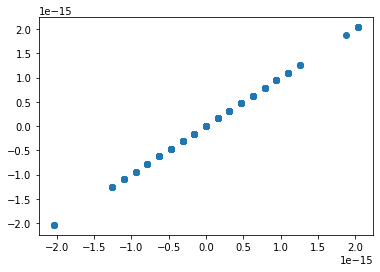

In [ ]:
PP = P.T
PP = PP[:,:-1]
YY = Y[:-1,:]
X_approx = np.dot(PP,YY)
X_approx=X_approx.T
plt.scatter(X_approx[:,1:2],X_approx[:,:1])
plt.show()

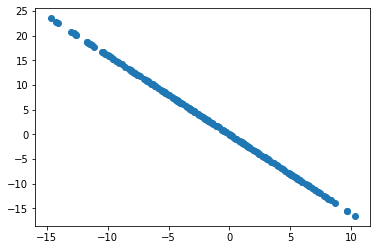

In [ ]:
#Transform back to original coordinates
PP = P.T
PP = PP[:,:-1]
YY = Y[:-1,:]
X_approx = PP * YY
plt.scatter(X_approx[:1,:],X_approx[1:2,:])
plt.show()
# scatter plt X_approx

## <font color='red'> 2. Implement PCA for 3D Data.
In this experiment consider 200 samples and obtain the matrix $X$ in $X = C \times D$, where $$C=\begin{bmatrix}
1&2&-1\\
2&2&1\\
-2&0&2\\
\end{bmatrix}$$ and $D$ is the randomly generated matix using samples. <font>

Hint for Code: Use np.linalg.eig, np.diag, np.matmul, np.cov

In [ ]:
# Write 3D Data and find X
D1=np.random.randint(100,size=(3,300))
C1=np.array([[1,2,-1],[2,2,1],[-2,0,2]])
X1=np.matmul(C1,D1)
X1

array([[ 152,   60,   41,   70,  142,  104,   37,  179,   26,  121,  119,
         142,  125,   94,  115,  118,   98,  194,   12,  187,  113,   70,
         238,  170,  124,   29,  -33,  235,   93,   78,  157,  224,  191,
          28,  183,  102,  -11,  140,  206,   50,   20,   75,  216,   69,
         185,  140,   42,   70,  145,  156,   -5,  206,  149,  177,   86,
          58,   57,   45,   96,  163,   51,  104,  169,  190,   -2,  190,
         111,   44,  180,  161,   86,    4,  170,   40,   77,  126,  220,
         176,   84,   61,   15,  143,  126,   11,  113,  177,   65,   92,
         121,  180,  -70,   77,  144,   96,    6,  142,   72,  215,  152,
          50,  114,  119,  168,  131,  139,  171,  158,  160,  164,   25,
         -30,   53,  226,  123,    9,  126,  -17,   10,  135,   28,  121,
           4,  198,   30,   44,  157,  169,  -39,  147,   74,   22,   19,
          59,   57,   67,  -16,  204,   -8,  176,   91,  133,   23,  123,
         112,  161,  189,  114,  108, 

In [ ]:
x=X1[:1,:]
y=X1[1:2,:]
z=X1[2:3,:]

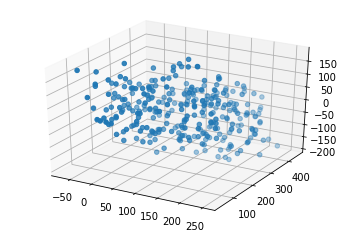

In [ ]:
# write code to scatter plot 3D
from mpl_toolkits import mplot3d
ax = plt.axes(projection ="3d")
ax.scatter3D(x,y,z)
plt.show()

### Implement PCA
Hint: refer class note.

In [ ]:
#Write code here

X1=X1.T

cov_mat = np.cov(X1 , rowvar = False)

E , P = np.linalg.eigh(cov_mat)



print('eigen values=',E)
print('eigen vectors=\n',P)

eigen values= [ 1038.76130647  5160.08077018 11984.40987429]
eigen vectors=
 [[ 0.81802296  0.10117819  0.56621675]
 [-0.43728085 -0.53011411  0.72647401]
 [ 0.37366281 -0.84186817 -0.38940223]]


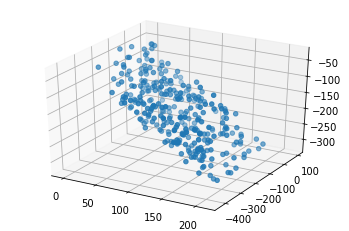

In [ ]:
P_T1=np.transpose(P)
Y1=np.matmul(P,X1.T)
ax = plt.axes(projection ="3d")
ax.scatter3D(Y1[:1,:],Y1[1:2,:],Y1[2:3,:])
plt.show()



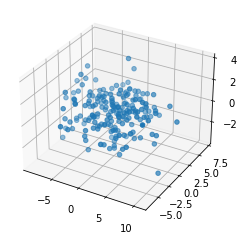

In [ ]:
# Transform data to new coordinates
#P = P.T
#Y = P*X




#Scatter plt Y

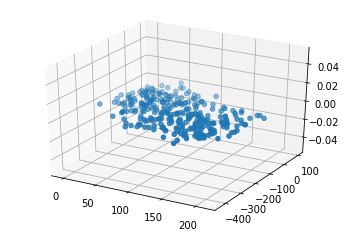

In [ ]:
Y1[2,:]=0
ax = plt.axes(projection ="3d")
ax.scatter3D(Y1[:1,:],Y1[1:2,:],Y1[2:3,:])
plt.show()


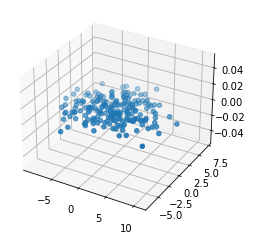

In [ ]:
#Approximate each 3-point data vector using two values
#Y[2,:]=0



#Scatter plot Y

300


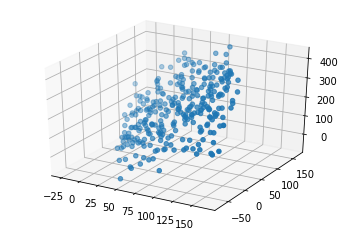

In [ ]:
ax = plt.axes(projection ="3d")
PP1=np.transpose(P_T1)
PP1=PP1[:,:-1]
YY1=Y1[:-1,:]
X_approx1=np.matmul(PP1,YY1)
print(len(X_approx1[0]))
ax.scatter3D(X_approx1[:1,:],X_approx1[1:2,:],X_approx1[2:3,:])
plt.show()

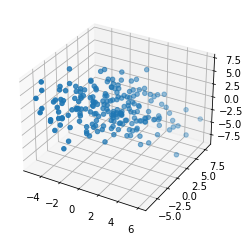

In [ ]:
#Transform back to original coordinates
#PP = P.T
#PP = PP[:,:-1]
#YY = Y[:-1,:]
#X_approx = PP*YY





#Scatter plot X_approx

## <font color='red'> 3. Implement PCA for image compression.<font> 
    Methodology: A set of face images is used to generate a basis matrix using PCA. Essentially this basis matrix would the input data which are correlated observations from the real world. By preserving different number of eigenvectors, different degrees of compression can be achieved.
    
    

You can use this link for face images:

https://drive.google.com/file/d/1XMtBihZypbE-zlg_DuAW63IF4vX4cn3d/view?usp=sharing

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving f1.pgm to f1.pgm
Saving f2.pgm to f2.pgm
Saving f3.pgm to f3.pgm
Saving f4.pgm to f4.pgm
Saving f5.pgm to f5.pgm
Saving f6.pgm to f6.pgm
Saving f7.pgm to f7.pgm
Saving f8.pgm to f8.pgm
Saving f9.pgm to f9.pgm
Saving f10.pgm to f10.pgm
Saving f11.pgm to f11.pgm
Saving f12.pgm to f12.pgm
Saving f13.pgm to f13.pgm
Saving f14.pgm to f14.pgm
Saving f15.pgm to f15.pgm
Saving f16.pgm to f16.pgm
Saving f17.pgm to f17.pgm
Saving f18.pgm to f18.pgm
Saving f19.pgm to f19.pgm
Saving f20.pgm to f20.pgm
Saving f21.pgm to f21.pgm
Saving f22.pgm to f22.pgm
Saving f23.pgm to f23.pgm
Saving f24.pgm to f24.pgm
Saving f25.pgm to f25.pgm
Saving f26.pgm to f26.pgm
Saving f27.pgm to f27.pgm
Saving f28.pgm to f28.pgm
Saving f29.pgm to f29.pgm
Saving f30.pgm to f30.pgm
Saving f31.pgm to f31.pgm
Saving f32.pgm to f32.pgm
Saving f33.pgm to f33.pgm
Saving f34.pgm to f34.pgm
Saving f35.pgm to f35.pgm
Saving f36.pgm to f36.pgm
Saving f37.pgm to f37.pgm
Saving f38.pgm to f38.pgm
Saving f39.pgm to f39.pgm


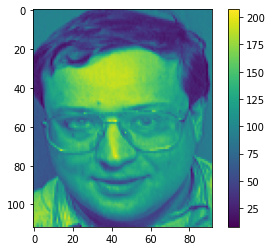

In [ ]:
a=glob.glob('*.pgm') # to read all images
X1 = mpimg.imread(a[0])
plt.imshow(X1)
plt.colorbar()
[m,n]=np.shape(X1)
X = X1.flatten()
X = np.zeros(shape=(np.size(a),m*n))
for i,j in zip(a,range(np.size(a))):
    X[j,:]=  mpimg.imread(i).flatten()

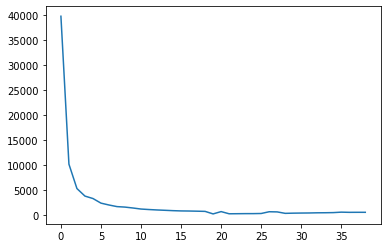

In [ ]:
cov_mat = np.cov(X.T , rowvar = False)
E, P = np.linalg.eig(cov_mat)
#E_T=np.transpose(E)
plt.figure()
plt.plot(E)


39


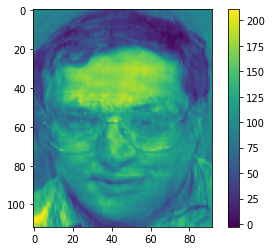

In [ ]:
P_T1=np.transpose(P)
Y1=np.matmul(P_T1,X)

#Y1=39*10304
Y1[29:39,:]=0
PP1=np.transpose(P_T1)
PP1=PP1[:,:-1]
YY1=Y1[:-1,:]
X_approx1=np.matmul(PP1,YY1)
X1r = np.reshape(X_approx1[0,:],[m,n])
plt.imshow(X1r)
plt.colorbar()
print(len(X_approx1))


### <font color='red'> Homework: Implement PCA for remote sensing image.<font>
    Methodology: A set of remotely sensed images (Cuprite hyperspectral data having 188 bands) is used to generate a basis matrix based on PCA, and this matrix would be used to uncorrelate the data which are correlated. By preserving different number of eigenvectors different degrees of compression can be achieved. Find the variance of the input and output in each case and note the observations.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving cuprite.mat to cuprite (3).mat


You can use this link for Cuprite images:

https://drive.google.com/file/d/1XMtBihZypbE-zlg_DuAW63IF4vX4cn3d/view?usp=sharing

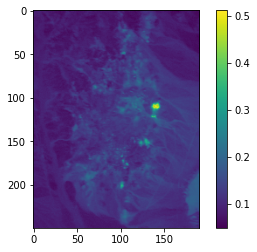

In [ ]:
X = sio.loadmat('cuprite (3).mat')
X= X['x']
X2 = np.reshape(X,[188,191,250])
plt.figure()
plt.imshow(X2[1,:,:].T)
plt.colorbar()

In [ ]:
X2.shape

(188, 191, 250)

In [ ]:
#print(len(X1[0]))
Z = X2.reshape(X2.shape[0]*X2.shape[1], -1)
print(Z.shape)
#cov_mat = np.cov(Z)
#E, P = np.linalg.eigh(cov_mat)
covariance_matrix=np.cov(Z.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

(35908, 250)


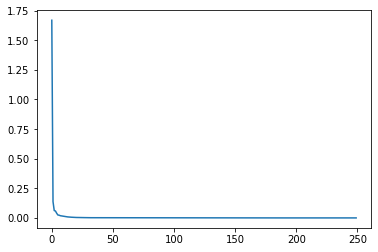

In [ ]:
#plot Eigen values of covariance matrix

plt.figure()
plt.plot(eigen_values)
plt.show()


In [ ]:
P_T1=np.transpose(eigen_vectors)
Y1=np.matmul(P_T1,Z.T)
print(Y1.shape)
#Y1=39*10304

Y1[240:250,:]=0
PP1=np.transpose(P_T1)
PP1=PP1[:,:-1]
YY1=Y1[:-1,:]
X_approx1=np.matmul(PP1,YY1)

(250, 35908)


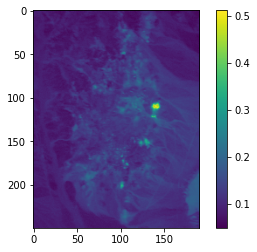

In [ ]:
#write code for PCA and approximate each data vector using few significant eigen values 
X1r = X_approx1.reshape([188,191,250])
plt.imshow(X1r.T)
plt.colorbar()

## <font color='red'> 4. Data generating process: 
In this experiment take two zero mean, unit variance, uncorrelated Gaussian random variables. Obtain the transformation matrix $A$ in $Y = A \times X$ such that $Y$ has a specified covariance matrix. (Take any valid covariance matrix in this case)<font>
Hint: $$Y=AX$$ $$C_Y=AC_XA^T$$ Digonalize $$C_Y=U\Sigma U^{-1}$$ So, $$U\Sigma^{\frac{1}{2}}\Sigma^{\frac{1}{2}} U^{-1}=AC_XA^T$$ If, $X$ is uncorrelated then $C_X$ must be identity.
<br>
Hint for Code: Use np.linalg.eig, np.diag, np.matmul, np.cov

In [ ]:
#  For example use this Cy
Cy = np.array([[4 , 2],
               [2 , 4]])
print(Cy)

[[4 2]
 [2 4]]


In [ ]:
no_samples=1000
mean = [0, 0]
Cx = [[1, 0], [0, 1]] 
X=np.random.multivariate_normal(mean, Cx,no_samples)
X

array([[ 0.52223135,  0.13200719],
       [-0.79475423,  1.11341545],
       [-0.80347998, -1.28671785],
       ...,
       [ 0.64373643,  0.09810664],
       [ 1.91450248, -0.49895614],
       [ 1.48671563,  0.88554758]])

In [ ]:
#Write code here
A=np.linalg.cholesky(Cy)
Y=A.dot(X.T).T
Cynew=np.cov(Y.T)
#Write code here
print("Cy_new=",Cynew)
print("Cx=",Cx)
print("Cy=",Cy)



Cy_new= [[4.24937232 2.21760066]
 [2.21760066 3.96859969]]
Cx= [[1, 0], [0, 1]]
Cy= [[4 2]
 [2 4]]


### <font color='red'> Homework: Consider providing more valid covariance matrices and generate correlated random data using the reverse PCA operation done in Problem-4. This is an instance of data generating process useful in machine learning algorithms.